[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/resize_antialias.ipynb)

# Resize anti-alias

In this tutorial we are going to learn how to resize an image with anti-alias.

## Install Kornia

In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs

## Prepare the data

Download an example image

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/drslump.jpg"
download_image(url)

'drslump.jpg'

In [ ]:
import kornia as K
import torch
from matplotlib import pyplot as plt

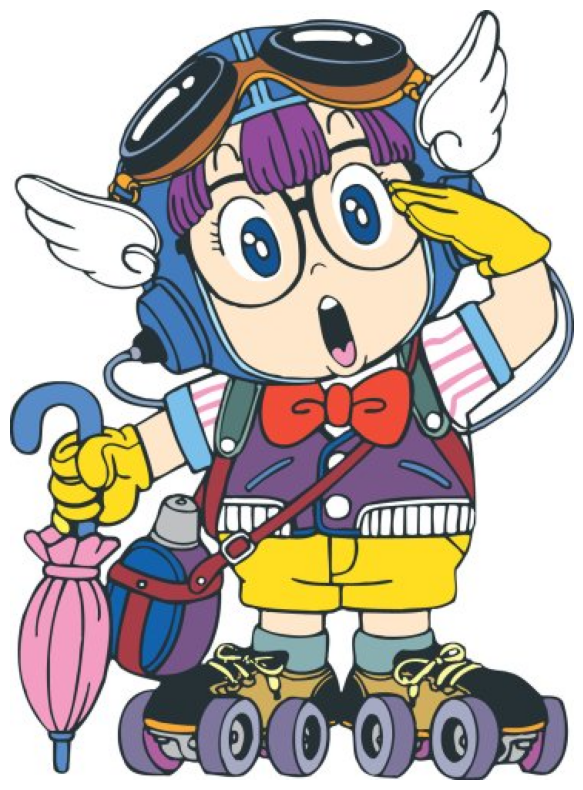

In [ ]:
def imshow(input: torch.Tensor):
    B = input.shape[0]
    fig, axes = plt.subplots(ncols=B, nrows=1, figsize=(20, 10))
    axes = axes if B > 1 else [axes]
    for idx, ax in enumerate(axes):
        ax.imshow(K.utils.tensor_to_image(input[idx]))
        ax.axis("off")


data: torch.Tensor = K.io.load_image("drslump.jpg", K.io.ImageLoadType.RGB32)[None, ...]  # BxCxHxW

# plot
imshow(data)

## Plain resize vs Antializased resize

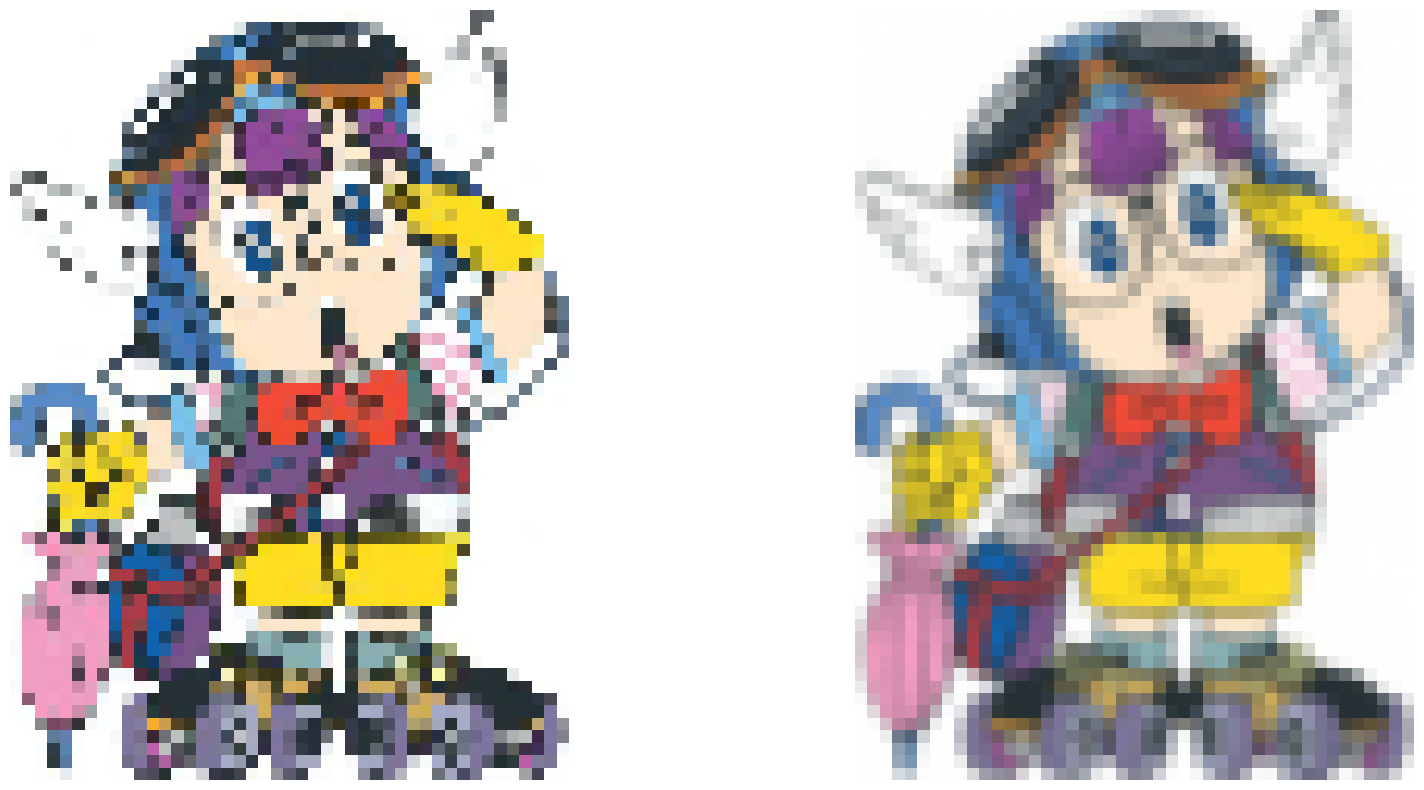

In [ ]:
x_025: torch.Tensor = K.geometry.rescale(data, (0.125, 0.125))
x_025AA: torch.Tensor = K.geometry.rescale(data, (0.125, 0.125), antialias=True)
out = torch.stack([x_025, x_025AA], dim=0)
imshow(out)